ON va utiliser l'API de USGS afin d'obtenir plus de données !

In [1]:
minlat, maxlat, minlong, maxlong = 30, 46, 129, 149
min_mag = 1

In [2]:
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

In [3]:
start_time="2016-01-01"
end_time="2016-02-01"

In [4]:
METHOD = "query"
PARAMETERS = f"format=csv&starttime={start_time}&endtime={end_time}&minlatitude={minlat}&maxlatitude={maxlat}&minlongitude={minlong}&maxlongitude={maxlong}&minmagnitude={min_mag}&orderby=time-asc"

In [5]:
url = f"https://earthquake.usgs.gov/fdsnws/event/1/{METHOD}?{PARAMETERS}"

In [6]:
import pandas as pd
import requests
import io

In [7]:
def query_data():
    df = pd.DataFrame({"time": [], "latitude": [], "longitude": [], "depth": [], "mag": []})
    for y in range(1960, 2022):
        y = str(y)
        for m in range(len(months) - 1):
            start_time = f"{y}-{months[m]}-01"
            end_time = f"{y}-{months[m + 1]}-01"
            PARAMETERS = f"format=csv&starttime={start_time}&endtime={end_time}&minlatitude={minlat}&maxlatitude={maxlat}&minlongitude={minlong}&maxlongitude={maxlong}&minmagnitude={min_mag}&orderby=time-asc"
            url = f"https://earthquake.usgs.gov/fdsnws/event/1/{METHOD}?{PARAMETERS}"
            r = requests.get(url).content
            data = pd.read_csv(io.StringIO(r.decode('utf-8')))
            #temp = df
            df = pd.concat([data.iloc[:, :5], df], ignore_index=True)  # On a seulement besoin des 5 premières colonnes que l'on ajoute à notre df
    return df

In [8]:
df = query_data()

In [9]:
df.head()

,time,latitude,longitude,depth,mag
0,2021-11-02T04:33:46.997Z,32.8876,136.8920,433.36,4.2
1,2021-11-02T11:00:40.223Z,31.0448,141.9867,10.00,4.5
2,2021-11-02T15:00:11.748Z,36.0259,143.0997,10.00,4.6
3,2021-11-03T00:02:23.264Z,35.9514,143.0183,10.00,4.5
4,2021-11-03T02:35:56.019Z,37.0785,141.2569,45.96,4.6


In [10]:
len(df)

31465

In [23]:
df.to_csv("eq_1960_2022.csv")

In [11]:
df.iloc[10000]

time         2011-03-12T07:13:37.480Z
latitude                       37.424
longitude                     142.007
depth                            47.2
mag                               5.0
Name: 10000, dtype: object

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='mag', ylabel='Count'>

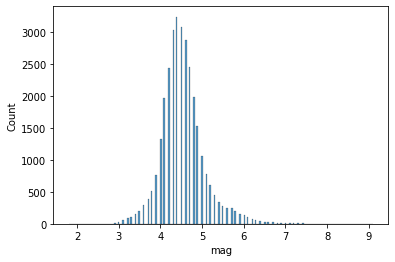

In [13]:
sns.histplot(df.mag)

In [14]:
len(df[df.mag >= 6])

608

In [15]:
len(df[df.mag >= 5])

4959

In [16]:
df.loc[1, "time"][:7]

'2021-11'

## test

In [17]:
sum(df.time.str.startswith("2000-01"))

39

In [18]:
start_time = "2000-01-01"
end_time = "2000-02-01"

In [19]:
PARAMETERS_test = f"format=csv&starttime={start_time}&endtime={end_time}&minlatitude={minlat}&maxlatitude={maxlat}&minlongitude={minlong}&maxlongitude={maxlong}&minmagnitude={min_mag}&orderby=time-asc&includeallmagnitudes=true"

In [20]:
url = f"https://earthquake.usgs.gov/fdsnws/event/1/{METHOD}?{PARAMETERS_test}"

In [21]:
r = requests.get(url).content
data_test = pd.read_csv(io.StringIO(r.decode('utf-8')))

In [22]:
data_test

,Error 400: Bad Request
0,Cannot use includeallorigins or includeallmagn...
1,Usage details are available from https://earth...
2,Request:
3,/fdsnws/event/1/query?format=csv&starttime=200...
4,Request Submitted:
5,2022-04-09T14:53:46+00:00
6,Service version:
7,1.13.3
